## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="https://github.com/exord/UNSAM_IA/blob/master/figures/fork_pullrequest.jpeg?raw=1", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

## 1. Probabilidad Condicional

In [0]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

--2020-04-14 02:08:11--  https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41983 (41K) [text/plain]
Saving to: ‘student-mat.csv’

student-mat.csv     100%[===================>]  41.00K  --.-KB/s    in 0.02s   

2020-04-14 02:08:12 (1.62 MB/s) - ‘student-mat.csv’ saved [41983/41983]



Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

In [0]:
import numpy as np
import pandas as pd

def prob_condicional(df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')):
  """Calcula P(absences < 3 | G3 >= 12).
  Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences > 3 dado que G3 >= 12
    """
  #Start
  Registros = len(df)

  df['aprobo'] = np.where(df['G3'] >= 12, 1, 0)
  df['faltoPoco'] = np.where(df['absences'] <3, 1, 0) 
  FaltoPoco = np.sum(df['faltoPoco'])
  Aprobo = np.sum(df['aprobo'])

  df['aprobo_y_falto_poco'] = np.where((df['aprobo']==1)&(df['faltoPoco']==1), 1, 0)
  AproboYFaltoPoco = np.sum(df['aprobo_y_falto_poco'])
  
  P_AproboYFaltoPoco = AproboYFaltoPoco/Registros
  P_Aprobo = Aprobo/Registros
  P_Final = P_AproboYFaltoPoco/P_Aprobo

  #guarda el valor final, como un número, en esta variable
  resultado = P_Final
  #Finish
  return resultado



$$  P( \text{absences} < 3 | \text{G3} \geq 12) = \frac{P((\text{G3} \geq 12) \cap (\text{absences} < 3))}{P( \text{G3} \geq 12)} $$

In [0]:
#prueba ejercicio 1
import numpy as np
import pandas as pd


df = pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')

Registros = len(df)
print("Cantidad de registros: {}".format(Registros))

df['aprueba'] = np.where(df['G3'] >= 12, 1, 0)
df['falto_menos_de_3_veces'] = np.where(df['absences'] <3, 1, 0)

FaltoPoco = np.sum(df['falto_menos_de_3_veces'])
Aprobo = np.sum(df['aprueba'])

df['aprobo_y_falto_poco'] = np.where((df['aprueba']==1)&(df['falto_menos_de_3_veces']==1), 1, 0)

df.head()

AproboYFaltoPoco = np.sum(df['aprobo_y_falto_poco'])

print("Cantidad de alumnos que faltaron poco: {}".format(FaltoPoco))
print("Cantidad de alumnos que aprobaron: {}".format(Aprobo))
print("Cantidad de alumnos que aprobaron y faltaron poco: {}".format(AproboYFaltoPoco))


P_AproboYFaltoPoco = AproboYFaltoPoco/Registros
P_Aprobo = Aprobo/Registros
P_FaltoPoco = FaltoPoco/Registros

P_Final = P_AproboYFaltoPoco/P_Aprobo

print("Probabilidad de faltar poco: {}".format(P_FaltoPoco))
print("Probabilidad de aprobar: {}".format(P_Aprobo))
print("Probabilidad de faltar poco y aprobar: {}".format(P_AproboYFaltoPoco))

print("Probabilidad de haber faltado poco tal que se aprobo: {}".format(P_Final))

Cantidad de registros: 395
Cantidad de alumnos que faltaron poco: 183
Cantidad de alumnos que aprobaron: 162
Cantidad de alumnos que aprobaron y faltaron poco: 81
Probabilidad de faltar poco: 0.46329113924050636
Probabilidad de aprobar: 0.41012658227848103
Probabilidad de faltar poco y aprobar: 0.20506329113924052
Probabilidad de haber faltado poco tal que se aprobo: 0.5
0.5


## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

In [0]:
import numpy as np
from scipy.stats import binom, norm

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos
    
    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)
    
    #Start
    prior = norm.pdf(mu, 0.5, 0.1) #Esto es el prior evaluado en el vector mu
    verosimilitud = binom.pmf(X,N,mu) #La verosimilitud evaluada en el vector mu
    posterior = prior*verosimilitud #el posterior no normalizado
    evidencia = posterior.sum()*0.01 #evidencia o verosimilitud marginalizada
    posterior = posterior/evidencia #normalizamos para obtener el posterior
    
    p = posterior[mu>0.7].sum()*0.01 #Probabilidad de que mu > 0.7 
    #Finish

    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)

La probabilidad de que mu sea mayor a 0.7 es de 4.816486020393553e-07


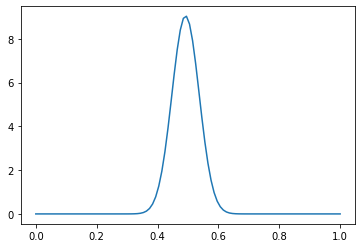

In [20]:
#prueba ejercicio 2
import numpy as np
from scipy.stats import binom, norm
from matplotlib import pyplot as plt

mu_t = 0.5# Defino el mu verdadero
N = 100 #número de tiradas

tiradas = np.where(np.random.rand(N) < mu_t, 1, 0) # Genera al azar 100 tiradas de una moneda con mu = 0.5.

p, posterior = inferencia_moneda(tiradas)
mu, step = np.linspace(0,1,num=100, retstep=True)

plt.plot(mu, posterior)
print('La probabilidad de que mu sea mayor a 0.7 es de {}'.format(p))

## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

In [0]:
import numpy as np

def ajuste_lineal(X_train, Y_train, X_test):
  """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

  N=len(X_train)
  N_test=len(X_test)
  #Start

  phi = np.hstack([X_train*0.0 + 1, X_train]) 

  pp = np.dot(phi.T, phi) 
  yy = np.dot(phi.T, Y_train)
  
  wml = np.linalg.solve(pp, yy) 
  
  #ahora guardamos los resultados en esta variable
  Y_test = wml[0] + wml[1]*X_test
  #Finish
  assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
  return np.array(Y_test)

(80, 1)


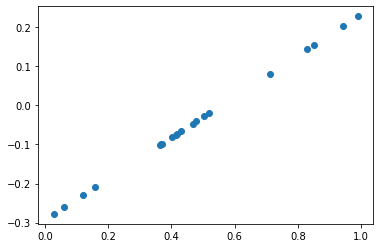

In [0]:
#prueba ejercicio 3
from matplotlib import pyplot as plt

x_ = np.random.rand(100, 1)
a_real = -0.3 + 0.5 * x_
noise = np.random.normal(0,0.2,[100,1])
t_ = a_real + noise

data = np.hstack([x_, t_])
data_train, data_test = elegir_test(data, 0.2)

x_train = data_train[:, 0].reshape(len(data_train), 1)
y_train = data_train[:, 1].reshape(len(data_train), 1)
x_test = data_test[:, 0].reshape(len(data_test), 1)

y_test = ajuste_lineal(x_train, y_train, x_test)

plt.scatter(x_test, y_test)

In [0]:
def elegir_test(data, fraccion, seed=1234): #elijo una cierta cantidad de datos aleatorios que vamos a tener en los datos tomados

    # Fijar el seed para ser reproducible
    import numpy.random as rr
    if seed is not None:
        rr.seed(seed)
    
    # Permuta los índices para elegir al azar
    ind = rr.permutation(len(data))
    # Calcula el número de elementos en el set de test
    ntest = int(len(data) * fraccion)
    
    # Construye los índices para cada conjunto
    indices_train = ind[ntest:] #del 20 en adelante van a ser los train
    indices_test = ind[:ntest] #hasta el 20 van a ser los test
    return data[indices_train], data[indices_test]